In [2]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

In [3]:
#importing the data
fifa19 = pd.read_csv('Fifa19.csv')

In [4]:
#Looking at the first five rows
fifa19.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [43]:
#Subsetting the Data Frame to just the players that we want
fifa19 = fifa19[fifa19['Overall'] >= 80]
fifa19.tail()
#checking the bottom five rows to make sure we have the correct data

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
550,550,121944,B. Schweinsteiger,33,https://cdn.sofifa.org/players/4/19/121944.png,Germany,https://cdn.sofifa.org/flags/21.png,80,80,Chicago Fire,...,87.0,76.0,74.0,75.0,14.0,14.0,13.0,13.0,11.0,€8.7M
551,551,110677,Moyá,34,https://cdn.sofifa.org/players/4/19/110677.png,Spain,https://cdn.sofifa.org/flags/45.png,80,80,Real Sociedad,...,60.0,15.0,14.0,14.0,84.0,77.0,81.0,80.0,79.0,€12.6M
552,552,54050,W. Rooney,32,https://cdn.sofifa.org/players/4/19/54050.png,England,https://cdn.sofifa.org/flags/14.png,80,80,DC United,...,86.0,57.0,55.0,40.0,10.0,11.0,13.0,8.0,7.0,€18M
553,553,49369,Fernando Torres,34,https://cdn.sofifa.org/players/4/19/49369.png,Spain,https://cdn.sofifa.org/flags/45.png,80,80,Sagan Tosu,...,69.0,39.0,22.0,18.0,14.0,13.0,8.0,9.0,10.0,€10M
554,554,49031,S. Sorrentino,39,https://cdn.sofifa.org/players/4/19/49031.png,Italy,https://cdn.sofifa.org/flags/27.png,80,80,Chievo Verona,...,66.0,25.0,10.0,13.0,81.0,82.0,66.0,82.0,79.0,€1.7M


In [44]:
#From over 18,000 players to 555 with an overall rating of 75 or above
fifa19.shape

(555, 89)

In [45]:
#Fiding the average speed by age, use double brackets to make it a data frame
ages = fifa19.groupby('Age')
avgspeed = ages[['SprintSpeed']].mean()
avgspeed.reset_index(inplace=True)
avgspeed

,Age,SprintSpeed
0,18,72.000000
1,19,78.666667
2,20,87.333333
3,21,76.307692
4,22,79.833333
5,23,73.185185
6,24,76.891304
7,25,74.254902
8,26,71.428571
9,27,73.698113


Text(0.5, 1.0, 'Average Speed by Age')

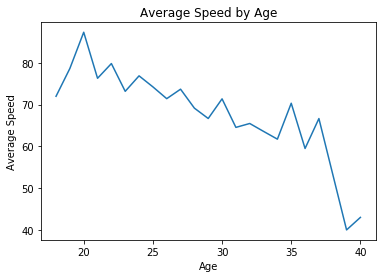

In [63]:
plt.plot(avgspeed[['Age']], avgspeed[['SprintSpeed']])
plt.xlabel('Age')
plt.ylabel('Average Speed')
plt.title('Average Speed by Age')

In [47]:
#Fastest 10 nations
nations = fifa19.groupby('Nationality')
natspeed = nations[['SprintSpeed']].mean()
natspeed.reset_index(inplace=True)
natspeed.sort_values('SprintSpeed', ascending=False).head(10)

,Nationality,SprintSpeed
23,Gabon,95.0
61,Venezuela,92.0
19,Egypt,91.0
33,Jamaica,90.0
15,DR Congo,88.0
37,Mali,88.0
36,Korea Republic,87.0
50,Scotland,86.0
18,Ecuador,85.0
17,Dominican Republic,85.0


In [48]:
#Slowest 10 nations
natspeed.sort_values('SprintSpeed', ascending=False).tail(10)

,Nationality,SprintSpeed
35,Kenya,61.000000
39,Montenegro,61.000000
27,Guinea,60.000000
56,Sweden,59.333333
29,Iceland,55.000000
12,Costa Rica,53.000000
14,Czech Republic,47.000000
43,Norway,46.000000
28,Hungary,44.000000
21,Finland,44.000000


In [52]:
#slowest 10 clubs
clubspeed.sort_values('SprintSpeed', ascending=False).tail(10)

,Club,SprintSpeed
0,1. FC Köln,51.0
78,SC Braga,51.0
99,VfL Wolfsburg,50.5
84,Sassuolo,49.5
45,Hertha BSC,46.0
27,Deportivo Alavés,42.0
76,River Plate,40.0
59,Montpellier HSC,40.0
88,Southampton,38.0
21,Chicago Fire,37.0


In [49]:
#Fastest 10 clubs
clubs = fifa19.groupby('Club')
clubspeed = clubs[['SprintSpeed']].mean()
clubspeed.reset_index(inplace=True)
clubspeed.sort_values('SprintSpeed', ascending=False).head(10)

,Club,SprintSpeed
9,Atlanta United,90.5
57,Medipol Başakşehir FK,89.0
51,Levante UD,88.0
92,Tianjin Quanjian FC,85.0
26,Dalian YiFang FC,83.0
11,Atlético Mineiro,82.0
95,Toronto FC,80.0
54,Los Angeles FC,80.0
39,Getafe CF,79.0
5,Al Nassr,79.0
